In [1]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Study data files
happiness_csv = "World _Happiness_Report_2005-2021.csv"

# Read the mouse data and the study results
happiness_metadata = pd.read_csv(happiness_csv)

happiness_metadata

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [3]:
empty_count_ladder=happiness_metadata["Life Ladder"].isna().sum()
empty_count_life=happiness_metadata["Healthy life expectancy at birth"].isna().sum()
print(f"Life Ladder column has {empty_count_ladder} empty cells")
print(f"Healthy life expectancy at birth column has {empty_count_life} empty cells")

Life Ladder column has 0 empty cells
Healthy life expectancy at birth column has 58 empty cells


In [4]:
happiness_life_clean_df=happiness_metadata.dropna(subset=["Healthy life expectancy at birth"])
happiness_life_clean_df

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


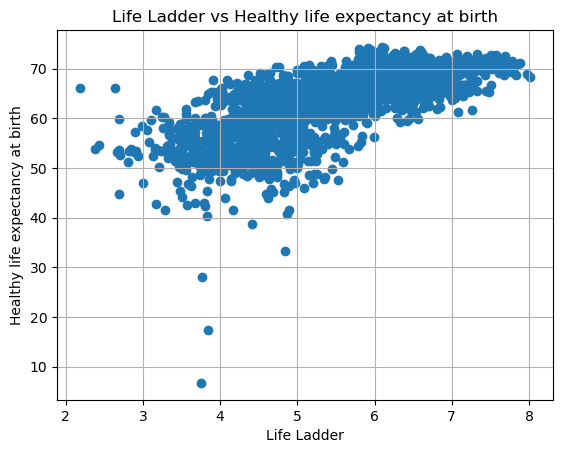

In [11]:
# Build scatter plot for Life Ladde vs. Life Expentancy
x_values = happiness_life_clean_df["Life Ladder"]
y_values = happiness_life_clean_df["Healthy life expectancy at birth"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.title(f"Life Ladder vs Healthy life expectancy at birth")
plt.xlabel("Life Ladder")
plt.ylabel("Healthy life expectancy at birth")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

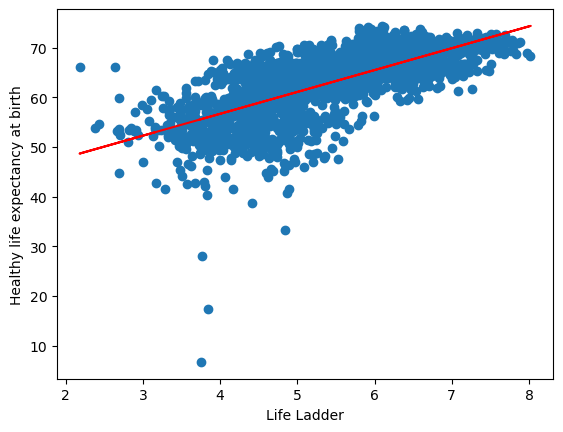

The r-squared is: 0.5095035336585704
Discussion about the linear relationship: 0.71


In [15]:
# Add the linear regression equation and line to plot
x_values = happiness_life_clean_df["Life Ladder"]
y_values = happiness_life_clean_df["Healthy life expectancy at birth"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Life Ladder")
plt.ylabel("Healthy life expectancy at birth")
plt.show()

 # Print r square value
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"Discussion about the linear relationship: {round(correlation[0],2)}")
